In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
from sklearn import model_selection 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import seaborn as sns
import random as rnd

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('Maize_2020.csv')

In [4]:
data = data[data.CHL.notnull()]

In [5]:
pd.value_counts(data.CHL, dropna=False)

428.700    2
427.025    2
471.550    2
486.675    2
445.250    2
          ..
296.675    1
495.100    1
460.100    1
404.650    1
401.250    1
Name: CHL, Length: 312, dtype: int64

In [6]:
col_filter = [col for col in data if col.startswith('X')]

In [7]:
X = data[col_filter]
y = data['CHL']


In [8]:
print(X)
print(y)

          X350      X351      X352      X353      X354      X355      X356  \
0     0.066393  0.041197  0.046172  0.070903  0.072898  0.076800  0.076229   
1     0.089343  0.047622  0.036665  0.063613  0.087790  0.076265  0.059558   
2     0.073535  0.035367  0.028720  0.058362  0.078162  0.076759  0.070137   
3     0.053849  0.013933  0.021878  0.062837  0.067202  0.072869  0.063967   
4     0.075200  0.047947  0.038910  0.054962  0.071838  0.075585  0.066497   
...        ...       ...       ...       ...       ...       ...       ...   
1636  0.086108  0.081353  0.069357  0.066578  0.101631  0.085885  0.060648   
1643  0.107635  0.088383  0.070858  0.075370  0.111884  0.094643  0.058673   
1645  0.115502  0.108385  0.094599  0.092437  0.127469  0.118700  0.088778   
1649  0.115839  0.081779  0.075903  0.100481  0.126021  0.114220  0.080029   
1655  0.097722  0.085333  0.080176  0.081388  0.087126  0.091395  0.068312   

          X357      X358      X359  ...     X2491     X2492    

In [10]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [11]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,-0.001196,-0.001424,0.016817,0.043293,-0.017776,-0.215791
1,0.004382,-0.006270,0.010405,0.037568,-0.154993,-0.143470
2,0.000294,-0.008340,0.014977,0.051162,-0.157394,-0.061261
3,-0.004654,-0.004934,0.024892,0.065327,-0.035700,-0.061890
4,0.001502,-0.007512,0.031674,0.064267,-0.053902,-0.104277


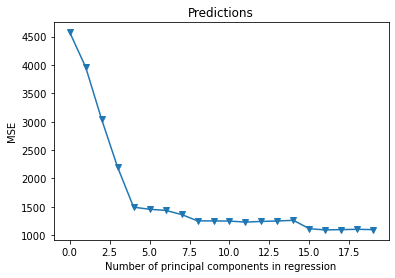

In [12]:
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Predictions')
plt.xlim(xmin=-1);

In [13]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([80.97, 92.16, 96.47, 97.65, 98.13, 98.36, 98.53, 98.68, 98.81,
       98.93, 99.04, 99.14, 99.23, 99.3 , 99.37, 99.43, 99.48, 99.52,
       99.56, 99.6 , 99.64, 99.67, 99.7 , 99.73, 99.75, 99.77, 99.79,
       99.81, 99.82, 99.83, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89,
       99.9 , 99.91, 99.92, 99.93, 99.94, 99.95, 99.96, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

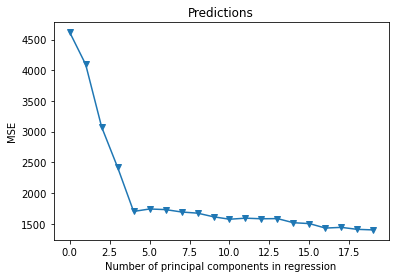

In [30]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Predictions')
plt.xlim(xmin=-1);


In [31]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)



1172.9796884145212

(-1.0, 19.9)

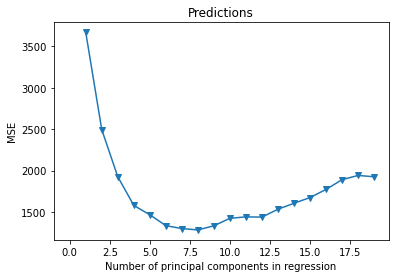

In [17]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Predictions')
plt.xlim(xmin=-1)



In [22]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

971.1164639559934

(-1.0, 19.9)

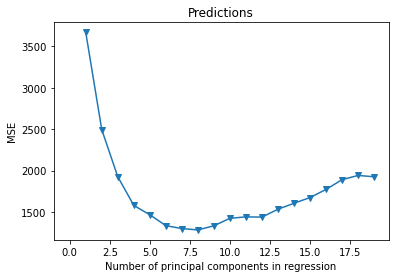

In [23]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Predictions')
plt.xlim(xmin=-1)

In [32]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

971.1164639559934

In [33]:
y_pred = pls.predict(X_test)

/home/schnablelab-guest/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted CHL Values')

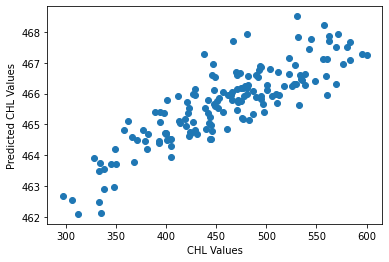

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('CHL Values')
plt.ylabel('Predicted CHL Values')
abline(lm(y_perd ~ y_test, data = mtcars), col = "blue"

/home/schnablelab-guest/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHL'>

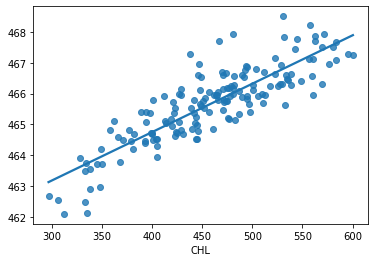

In [40]:
sns.regplot(y_test, y_pred, ci=None)